importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
#importing the training set
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')

In [3]:
dataset_train.head()


,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [4]:
# to simplify this training procedure we will use only one column of this data frame
training_set = dataset_train.iloc[:, 1:2].values


feature scaling

In [5]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
training_set_scaled = sc.fit_transform(training_set)

In [6]:
training_set_scaled.shape

(1258, 1)

In [7]:
# creating a data structure with 60 timestep, 
# about the way to use LSTMs : first we choose a number as a timestep in which every seq in a timestep, will be open to look at and the 
# nth number is the value to be predicted, so in this program we will append the 60*x element to the y_train array
x_train = []
y_train = []

#1258 is the number of rows
for i in range (60, 1258):
  x_train.append(training_set_scaled[i-60:i, 0])
  y_train.append(training_set_scaled[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train) 


x_train = np.reshape(x_train,( x_train.shape[0], x_train.shape[1], 1))

In [8]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [9]:
#unit is the number of sequence passed to the next layer, in this proposed LSTM we have 4 layers
#the dropout is for preventing the overtraining propblem of the network by omiting some of the neurons randomly

regressor = Sequential()
regressor.add(LSTM(units=50, return_sequences=True, input_shape = (x_train.shape[1], 1)))
regressor.add(Dropout(0.2))

In [10]:
regressor.add(LSTM(units=50, return_sequences=True,))
regressor.add(Dropout(0.2))

In [11]:
regressor.add(LSTM(units=50, return_sequences=True,))
regressor.add(Dropout(0.2))

In [12]:
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

In [13]:
regressor.add(Dense(units = 1))

In [14]:
regressor.compile(optimizer ='adam', loss = 'mean_squared_error')

In [15]:
regressor.fit(x_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
38/38 [==============================] - 11s 15ms/step - loss: 0.1158
Epoch 2/100
38/38 [==============================] - 1s 14ms/step - loss: 0.0083
Epoch 3/100
38/38 [==============================] - 1s 13ms/step - loss: 0.0063
Epoch 4/100
38/38 [==============================] - 1s 13ms/step - loss: 0.0055
Epoch 5/100
38/38 [==============================] - 1s 13ms/step - loss: 0.0059
Epoch 6/100
38/38 [==============================] - 1s 13ms/step - loss: 0.0049
Epoch 7/100
38/38 [==============================] - 1s 13ms/step - loss: 0.0050
Epoch 8/100
38/38 [==============================] - 1s 13ms/step - loss: 0.0061
Epoch 9/100
38/38 [==============================] - 1s 14ms/step - loss: 0.0048
Epoch 10/100
38/38 [==============================] - 1s 13ms/step - loss: 0.0050
Epoch 11/100
38/38 [==============================] - 0s 13ms/step - loss: 0.0046
Epoch 12/100
38/38 [==============================] - 1s 13ms/step - loss: 0.0044
Epoch 13/100
38/38 [====

In [17]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real = dataset_test.iloc[:, 1:2].values

In [23]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test =[]

for i in range (60, 80):
  X_test.append(inputs[i-60:i, 0])
X_test= np.array(X_test) 
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
pred = regressor.predict(X_test)
pred = sc.inverse_transform(pred)

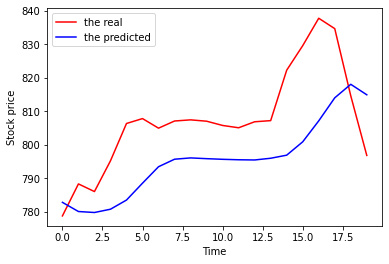

In [25]:
plt.plot(real, color = 'r', label= 'the real ')
plt.plot(pred, color = 'b', label= 'the predicted')
plt.xlabel('Time')
plt.ylabel('Stock price')
plt.legend()
plt.show()